In [1]:
# Enter your name: Yung Han Wei

### Instructions:
Complete the problems below. Problems 1-11 contain missing syntax denoted with three dashes (---). Replace the dashes enter the proper code and display the output. Use any predefined variables as arguments in the function/method whenever provided.
Problems 12 & 13 require that you code the entire solution. Save your file as a pdf and submit your jupyter file and PDF to Blackboard. 

#### Problem 0

In [2]:
#a
#Run this cell first before moving on

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import os
os.getcwd()

'C:\\Users\\Herry\\MIS_433'

In [3]:
#b
#Use the urls to load the data using the read_csv function.

url_cases = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
url_deaths = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
df_cases = pd.read_csv(url_cases)
df_deaths = pd.read_csv(url_deaths)

#### Problem 1

In [4]:
#1a
#Drop the following columns for df_cases and df_deaths using the drop list. 
# Set inplace to True
# Note: if you try to run a code cell twice that has inplace=True, an error will likely output, 
#       to remove error, restart Kernel and re-run cells.

drop = ["UID", "iso2", "iso3", "code3", "FIPS", "Country_Region","Lat", "Long_"]
df_cases.drop(columns=drop, inplace=True)
df_deaths.drop(columns=drop , inplace=True)

In [5]:
#1b
# Now review the first 6 columns for both df_cases and df_deaths using the slicing technique (":")
# This is to make sure the columns from part a were removed, as specified in 1a.

print(df_cases.columns[0:6])
print(df_deaths.columns[0:6])

Index(['Admin2', 'Province_State', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20'],
      dtype='object')
Index(['Admin2', 'Province_State', 'Combined_Key', 'Population', '1/22/20',
       '1/23/20'],
      dtype='object')


In [6]:
#1c
# Review the first 6 columns names (again) for df_cases and df_deaths
# Notice that df_deaths has a Population column but not df_cases (Problem 4 will address this)

print(df_cases.columns[:6])
print(df_deaths.columns[:6])

Index(['Admin2', 'Province_State', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20'],
      dtype='object')
Index(['Admin2', 'Province_State', 'Combined_Key', 'Population', '1/22/20',
       '1/23/20'],
      dtype='object')


#### Problem 2

In [7]:
#2a
#Rename the columns for both dataframes using the rename dictionary
# Set inplace=True

rename = {"Admin2": "county", "Province_State" : "state", "Combined_Key" : "county_state"}
df_cases.rename(columns=rename, inplace=True)
df_deaths.rename(columns=rename, inplace=True)

# Review the first 6 columns names for df_cases and df_deaths
# Be sure the that column names are renamed as specified above in 2a.
print(df_cases.columns[0:6])
print(df_deaths.columns[0:6])

Index(['county', 'state', 'county_state', '1/22/20', '1/23/20', '1/24/20'], dtype='object')
Index(['county', 'state', 'county_state', 'Population', '1/22/20', '1/23/20'], dtype='object')


#### Problem 3

In [8]:
#Melt/reshape df_cases. Use the keep list for the id_vars parameter.
# Set var_name="date" and value_name="cases" 

id_vars_cases = ["county", "state", "county_state"]
df_cases_melted = pd.melt(df_cases, 
                          id_vars=id_vars_cases, 
                          var_name="date", 
                          value_name="cases")
df_cases_melted.tail()

,county,state,county_state,date,cases
3819901,Teton,Wyoming,"Teton, Wyoming, US",3/9/23,12134
3819902,Uinta,Wyoming,"Uinta, Wyoming, US",3/9/23,6406
3819903,Unassigned,Wyoming,"Unassigned, Wyoming, US",3/9/23,0
3819904,Washakie,Wyoming,"Washakie, Wyoming, US",3/9/23,2755
3819905,Weston,Wyoming,"Weston, Wyoming, US",3/9/23,1905


#### Problem 4

In [9]:
#Melt/reshape df_deaths.  
# Set var_name="date" and value_name="deaths" 

id_vars_deaths = ["county", "state", "county_state", "Population"]
df_deaths_melted = pd.melt(df_deaths, id_vars=id_vars_deaths, 
                           var_name="date", 
                           value_name='deaths')
df_deaths_melted.tail()

,county,state,county_state,Population,date,deaths
3819901,Teton,Wyoming,"Teton, Wyoming, US",23464,3/9/23,16
3819902,Uinta,Wyoming,"Uinta, Wyoming, US",20226,3/9/23,43
3819903,Unassigned,Wyoming,"Unassigned, Wyoming, US",0,3/9/23,0
3819904,Washakie,Wyoming,"Washakie, Wyoming, US",7805,3/9/23,51
3819905,Weston,Wyoming,"Weston, Wyoming, US",6927,3/9/23,23


#### Problem 5

In [10]:
#Merge the melted dataframes for df_cases and df_deaths.
#df contains data for all counties in the United States

df = pd.merge(df_cases_melted, df_deaths_melted)
df.tail()

,county,state,county_state,date,cases,Population,deaths
3819901,Teton,Wyoming,"Teton, Wyoming, US",3/9/23,12134,23464,16
3819902,Uinta,Wyoming,"Uinta, Wyoming, US",3/9/23,6406,20226,43
3819903,Unassigned,Wyoming,"Unassigned, Wyoming, US",3/9/23,0,0,0
3819904,Washakie,Wyoming,"Washakie, Wyoming, US",3/9/23,2755,7805,51
3819905,Weston,Wyoming,"Weston, Wyoming, US",3/9/23,1905,6927,23


#### Problem 6

In [11]:
#Change the dates column in df to a datetime object. 

df.date = pd.to_datetime(df['date'])
df.dtypes

county                  object
state                   object
county_state            object
date            datetime64[ns]
cases                    int64
Population               int64
deaths                   int64
dtype: object

#### Problem 7

In [12]:
#7a
#Group df on the date column and do a .sum() on the cases column.
#This aggregates the data to a national level by 
#    totaling all county cases & deaths by each date.

usa = df.groupby("date", as_index=False)[["cases", "deaths"]].sum()
usa.tail() # last cases value should be: 103802702 on March 9, 2023

,date,cases,deaths
1138,2023-03-05,103646975,1122134
1139,2023-03-06,103655539,1122181
1140,2023-03-07,103690910,1122516
1141,2023-03-08,103755771,1123246
1142,2023-03-09,103802702,1123836


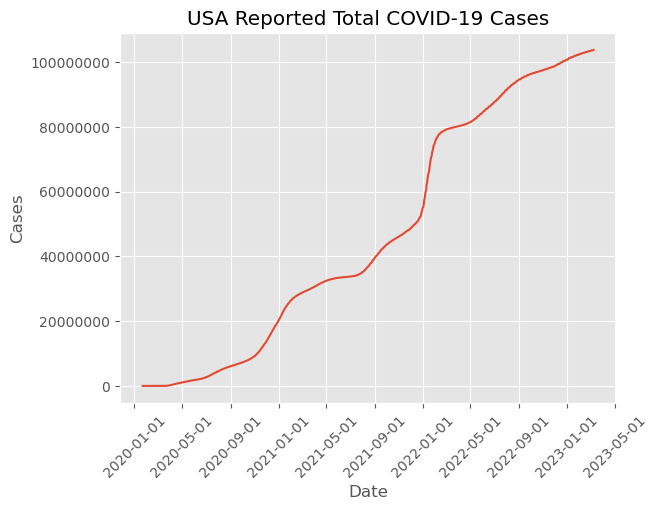

In [13]:
#7b
# Refer to the usa dataframe in the plot method to display USA cases over all time periods (date)

fig, ax = plt.subplots()
# Provided code to format x and y axis: 
import matplotlib.dates as mdates
ax.yaxis.get_major_formatter().set_scientific(False) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 

# Code to develop a line chart 
ax.plot(usa["date"], usa["cases"]) # <------ fill in the blanks
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
ax.set_title("USA Reported Total COVID-19 Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Problem 8

In [14]:
#8a
#Create derived data column named new_cases using the diff() method on usa's cases.

usa["new_cases"] = usa.cases.diff()
usa.tail()

,date,cases,deaths,new_cases
1138,2023-03-05,103646975,1122134,-3862.0
1139,2023-03-06,103655539,1122181,8564.0
1140,2023-03-07,103690910,1122516,35371.0
1141,2023-03-08,103755771,1123246,64861.0
1142,2023-03-09,103802702,1123836,46931.0


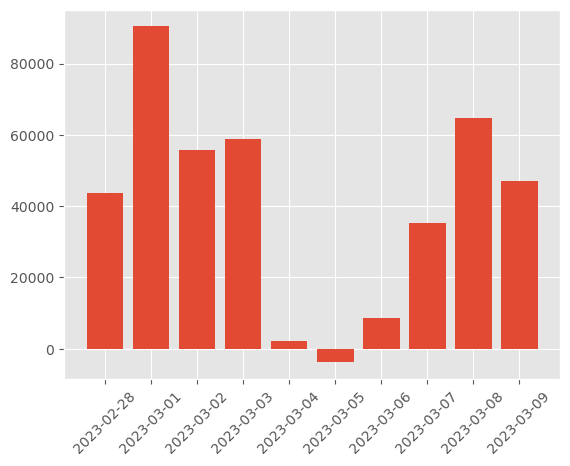

In [15]:
#8b
#Plot a bar chart using last ten dates and new_cases from usa  

plt.bar(usa.date.iloc[-10:], usa.new_cases.iloc[-10:])
plt.xticks(rotation=45)
plt.show()

In [16]:
usa

,date,cases,deaths,new_cases
0,2020-01-22,1,1,NaN
1,2020-01-23,1,1,0.0
2,2020-01-24,2,1,1.0
3,2020-01-25,2,1,0.0
4,2020-01-26,5,1,3.0
...,...,...,...,...
1138,2023-03-05,103646975,1122134,-3862.0
1139,2023-03-06,103655539,1122181,8564.0
1140,2023-03-07,103690910,1122516,35371.0
1141,2023-03-08,103755771,1123246,64861.0


#### Problem 9

In [17]:
#Filter usa to only contain data related to 2021.

usa2021 = usa[(usa.date >= "2021-01-01") & (usa.date <= "12/31/2021")].copy()
usa2021

,date,cases,deaths,new_cases
345,2021-01-01,20397401,352813,177520.0
346,2021-01-02,20670025,355409,272624.0
347,2021-01-03,20873238,356837,203213.0
348,2021-01-04,21059971,358853,186733.0
349,2021-01-05,21292113,362429,232142.0
...,...,...,...,...
705,2021-12-27,52914266,818614,506071.0
706,2021-12-28,53286726,820895,372460.0
707,2021-12-29,53797747,823250,511021.0
708,2021-12-30,54395695,824737,597948.0


#### Problem 10

In [18]:
# To retrieve summary statistics, use the describe method on the new_cases column for usa2021

usa2021.new_cases.describe()

count       365.000000
mean      95035.224658
std       81242.584790
min        4271.000000
25%       41529.000000
50%       72250.000000
75%      130407.000000
max      597948.000000
Name: new_cases, dtype: float64

#### Problem 11

In [19]:
# Refer to usa data frame,
# how many days of reported cases does of COVID19 data set consist of? 
# Hint: Use the usa date column along with the max() and min() methods
#       Subtract the maximum date value and minimum date value.

usa.date.max() - usa.date.min()

Timedelta('1142 days 00:00:00')

#### Problem 12


In [20]:
# Determine the average number of new cases in 2022 for Virginia. 
# To solve, do the following:
#   1. Create a subset dataframe from the df dataframe to only include Virginia data (it must have all counties in Virginia)
#   2. Filter the subset dataframe to focus only on 2022 data
#   3. Aggregate the filtered subset using the groupby() method on date and sum() method on cases
#   4. Create a new_cases column using the diff() method on cases
#   5. Finally, use the mean() method on the aggregated subset

va2022 = df[df.state == "Virginia"]
va2022 = va2022 [(va2022.date >= "01-01-2022") & (va2022.date <= "12-31-2022")]
va2022 = va2022.groupby("date", as_index=False) [["cases"]].sum()
va2022["new_cases"] =va2022.cases.diff()
va2022.new_cases.mean()




2969.186813186813

#### Problem 13

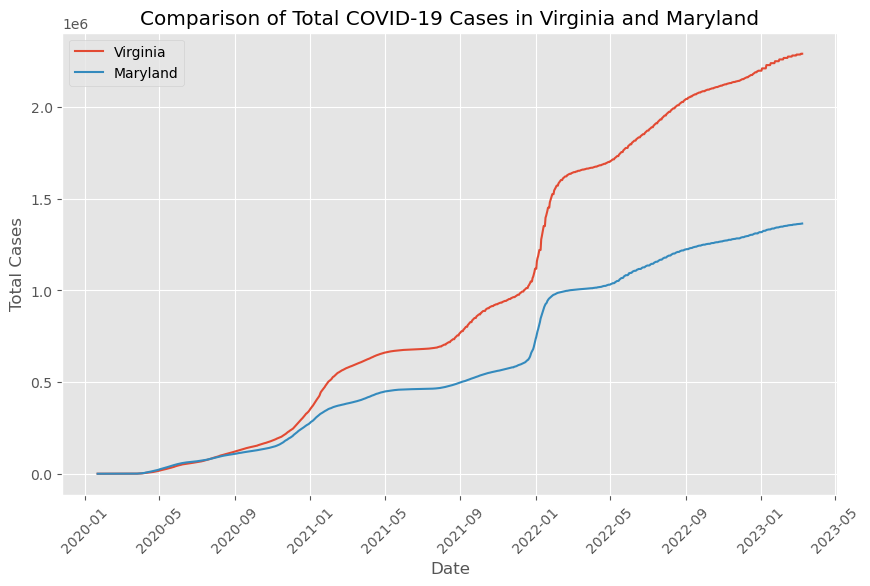

In [32]:
# 13a 
# Develop two line charts in a plot using .plot() that 
#     compares Virginia and Maryland total cases over time (all time periods). 
# An preliminary example is shown below. Your output should look roughly similiar. 
#     Include x & y labels and a legend to distinguish between VA amd MD.
# Note: Do not use new_cases column.

va_df = df[df["state"] == "Virginia"]
md_df = df[df["state"] == "Maryland"]
plt.figure(figsize = (10, 6))

virginia_total_cases = va_df.groupby("date")["cases"].sum().reset_index()
maryland_total_cases = md_df.groupby("date")["cases"].sum().reset_index()

plt.plot(virginia_total_cases["date"], virginia_total_cases["cases"], label="Virginia")
plt.plot(maryland_total_cases["date"], maryland_total_cases["cases"], label="Maryland")


plt.ylabel("Total Cases")
plt.xlabel("Date")
plt.title("Comparison of Total COVID-19 Cases in Virginia and Maryland")
plt.xticks(rotation=45)

plt.legend()

plt.show()




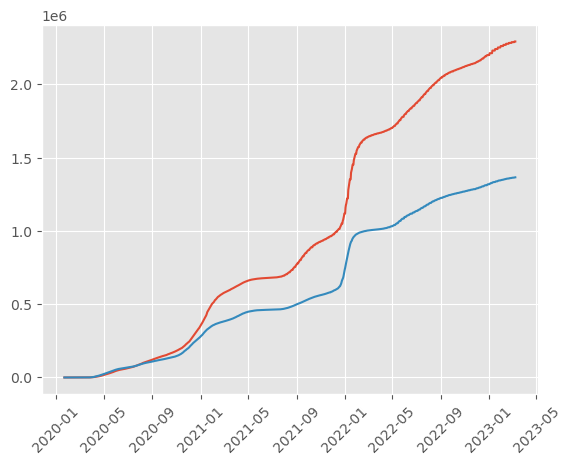

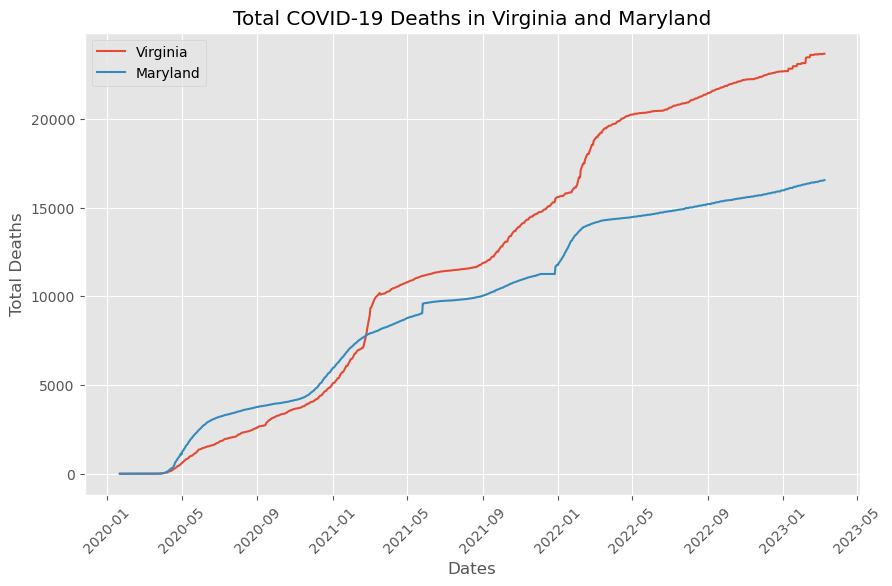

In [47]:
#13b 
# Develop two line charts in a plot using .plot() that 
#     compares Virginia and Maryland total deaths over time (all time periods). 
# Develop a line chart using .plot() that compares Virginia and Maryland deaths over time. 
# Example output below.

va_df = df[df["state"] == "Virginia"]
md_df = df[df["state"] == "Maryland"]

virginia_total_cases2 = va_df.groupby("date")["deaths"].sum().reset_index()
maryland_total_cases2 = md_df.groupby("date")["deaths"].sum().reset_index()

plt.figure(figsize = (10,6))
plt.plot(virginia_total_cases2 ["date"], virginia_total_cases2 ["deaths"], label = "Virginia")
plt.plot(maryland_total_cases2 ["date"], maryland_total_cases2 ["deaths"], label = "Maryland")

plt.xlabel("Dates")
plt.ylabel("Total Deaths")
plt.title("Total COVID-19 Deaths in Virginia and Maryland")
plt.xticks(rotation = 45)

plt.legend()
plt.show
_ =plt.show


